#Integrantes
####Juan Sebastian Moncada
####Johan Sanchez Rojas

In [1]:
!pip install blosc2
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039141 sha256=6d65a6a5d9a4c5c279b5e5cab375e9bfa0b99bd36aaf58fd3bbf79978a35a1e9
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


In [2]:
!pip install bertopic
!pip install spacy
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformer

In [3]:
!pip install kmodes

In [4]:
import pandas as pd
import numpy as np
import json
import requests
import es_core_news_lg

import matplotlib.pyplot as plt
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from kmodes.kprototypes import KPrototypes
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro


from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import MaximalMarginalRelevance

plt.style.use('ggplot')

In [5]:
path="/content/pqr_processed.csv"
df=pd.read_csv(path, sep=';', index_col=0)
df.head()

,Unnamed: 0,IDENTIFICADOR,MOTIVO,PQR,USUARIO
0,0,23-05134795,Afiliaciones,mil veintitres senores identificada cedula ciu...,41859039
1,1,23-05135671,Faltante de medicamentos y aliadas,requiere medicamentos alginato sodio bicarbona...,52294841
2,2,23-05134396,Faltante de medicamentos y aliadas,tardes cordial presente manifestar molestia al...,65090345
3,3,23-05128499,Citas Medicas,inquietud queja prestada nombrado odontologia ...,1053988549
4,4,23-05130856,Calidad Tecnico Cientifica,queja dirijo presentar queja formal cirujano m...,1047595573


In [6]:
df['PQR'] = df['PQR'].astype(str)
pqr = df['PQR'].tolist()

In [10]:
#stopwords
nlp = es_core_news_lg.load()
spanish_stop_words_spacy = nlp.Defaults.stop_words
vectorizer = CountVectorizer(lowercase = True, stop_words = list(spanish_stop_words_spacy))


#Clasificacion de pqrs

In [20]:
vectorizer_model = vectorizer
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
#representation_model = KeyBERTInspired()
representation_model = MaximalMarginalRelevance(diversity=0.8)

seed_topic_list = [['c pap','b pap','cpap','bpap','c-pap','b-pap','canula','bala','concentrador','oxi','mascara','oxigeno'],
                   ['domiciliario','cuidador','enfermera','domiciliaria','hospitalizacion','casa','phd','pad','hospitalizacion','paliativo','en casa'],
                   ['reapertura','reexploracion','reimplante','pexia','sondeo','intubacion','inplante','transplante','implante','inyecciones',
                    'seccion','lavado','apertura','cirugia','biopsia','retiro','toma','quirurgico','retiro','programacion','programar']]

topic_model = BERTopic(
    seed_topic_list=seed_topic_list,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    representation_model=representation_model,
    language="multilingual",
    calculate_probabilities=True,
    verbose=True)
topics, probs = topic_model.fit_transform(pqr)

#topic_model = BERTopic(embedding_model="PlanTL-GOB-ES/roberta-base-bne", calculate_probabilities=True, verbose=True)
#topics, probs = topic_model.fit_transform(pqr)

Batches:   0%|          | 0/177 [00:00<?, ?it/s]

2023-11-11 13:38:04,173 - BERTopic - Transformed documents to Embeddings


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-11 13:38:22,433 - BERTopic - Reduced dimensionality
2023-11-11 13:38:24,715 - BERTopic - Clustered reduced embeddings


In [21]:
#visualizando topicos generados
topic_model.visualize_topics().show()


In [13]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2300,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...
1,0,290,0_tabletas_agotado_aplicacion_unidades,"[tabletas, agotado, aplicacion, unidades, sumi...",[identificada representacion usuaria tejada id...
2,1,252,1_renal_cardiologia_glucosa_insuficiencia,"[renal, cardiologia, glucosa, insuficiencia, b...",[presente pongo conocimiento queja prestada ca...
3,2,187,2_ortopedia_fractura_osteosintesis_lesion,"[ortopedia, fractura, osteosintesis, lesion, m...",[peticionario ips asistencia medica general pr...
4,3,137,3_validacion_normatividad_diagnostico_subsidiado,"[validacion, normatividad, diagnostico, subsid...",[peticionario sic ips subsidiado diagnostico e...
...,...,...,...,...,...
57,56,13,56_plataformas_manual_extension_virtuales,"[plataformas, manual, extension, virtuales, ce...",[peticionario mora realizacion procedimiento a...
58,57,12,57_nery_hospitalizacion_domiciliaria_desestabi...,"[nery, hospitalizacion, domiciliaria, desestab...",[representacion nery reyes anos tutela integra...
59,58,12,58_piedras_semanal_epidural_colabopracion,"[piedras, semanal, epidural, colabopracion, pr...",[cordial radica queja inoportunidad agendamien...
60,59,11,59_intentato_mayorsigue_mahecha_determinacion,"[intentato, mayorsigue, mahecha, determinacion...",[cirugia intentato veses mes agosto requiere p...


In [14]:
topic_model.get_document_info(pqr,df=df)

,Unnamed: 0,IDENTIFICADOR,MOTIVO,PQR,USUARIO,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,0,23-05134795,Afiliaciones,mil veintitres senores identificada cedula ciu...,41859039,mil veintitres senores identificada cedula ciu...,-1,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,cirugia - incapacidades - presente - linea - s...,0.422692,False
1,1,23-05135671,Faltante de medicamentos y aliadas,requiere medicamentos alginato sodio bicarbona...,52294841,requiere medicamentos alginato sodio bicarbona...,0,0_tabletas_agotado_aplicacion_unidades,"[tabletas, agotado, aplicacion, unidades, sumi...",[identificada representacion usuaria tejada id...,tabletas - agotado - aplicacion - unidades - s...,0.248798,False
2,2,23-05134396,Faltante de medicamentos y aliadas,tardes cordial presente manifestar molestia al...,65090345,tardes cordial presente manifestar molestia al...,0,0_tabletas_agotado_aplicacion_unidades,"[tabletas, agotado, aplicacion, unidades, sumi...",[identificada representacion usuaria tejada id...,tabletas - agotado - aplicacion - unidades - s...,0.179571,False
3,3,23-05128499,Citas Medicas,inquietud queja prestada nombrado odontologia ...,1053988549,inquietud queja prestada nombrado odontologia ...,-1,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,cirugia - incapacidades - presente - linea - s...,0.457046,False
4,4,23-05130856,Calidad Tecnico Cientifica,queja dirijo presentar queja formal cirujano m...,1047595573,queja dirijo presentar queja formal cirujano m...,15,15_anestesiologo_paredes_crab_abuelo,"[anestesiologo, paredes, crab, abuelo, operato...",[romero cedula ciudadania proceso quirurgico o...,anestesiologo - paredes - crab - abuelo - oper...,0.156919,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,5628,23-04127039,Medicina Laboral,solicito amable colaboracion realizando valida...,901287668,solicito amable colaboracion realizando valida...,-1,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,cirugia - incapacidades - presente - linea - s...,0.650561,False
5629,5629,23-05128383,Cobertura,presencia organizacion gubernamental trabaja p...,891184665,presencia organizacion gubernamental trabaja p...,-1,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,cirugia - incapacidades - presente - linea - s...,0.509830,False
5630,5630,23-05132686,Procesos Administrativos,forma respetuosa permito queja cajera atendio ...,32994845,forma respetuosa permito queja cajera atendio ...,-1,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,cirugia - incapacidades - presente - linea - s...,0.756447,False
5631,5631,23-05135440,Prestaciones Economicas,calidad representante legal solicito prestacio...,1020600791,calidad representante legal solicito prestacio...,-1,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,cirugia - incapacidades - presente - linea - s...,0.733565,False


In [15]:
top_topics = 25

topics_pivot = topic_model.get_topic_info()

events_count = topics_pivot['Count'].sum()

def calc_perc(row):
  return round(row['Count']*100/events_count, 2)

topics_pivot['Perc'] = topics_pivot.apply (lambda row: calc_perc(row), axis=1)

topics_pivot.head(top_topics)

,Topic,Count,Name,Representation,Representative_Docs,Perc
0,-1,2300,-1_cirugia_incapacidades_presente_linea,"[cirugia, incapacidades, presente, linea, serv...",[verificando manifiesta hermana diagnosticada ...,40.83
1,0,290,0_tabletas_agotado_aplicacion_unidades,"[tabletas, agotado, aplicacion, unidades, sumi...",[identificada representacion usuaria tejada id...,5.15
2,1,252,1_renal_cardiologia_glucosa_insuficiencia,"[renal, cardiologia, glucosa, insuficiencia, b...",[presente pongo conocimiento queja prestada ca...,4.47
3,2,187,2_ortopedia_fractura_osteosintesis_lesion,"[ortopedia, fractura, osteosintesis, lesion, m...",[peticionario ips asistencia medica general pr...,3.32
4,3,137,3_validacion_normatividad_diagnostico_subsidiado,"[validacion, normatividad, diagnostico, subsid...",[peticionario sic ips subsidiado diagnostico e...,2.43
5,4,132,4_mascara_pagina_nefrologia_examen,"[mascara, pagina, nefrologia, examen, tension,...",[superintendencia nacional syulis identificada...,2.34
6,5,129,5_pediatras_cardio_icbf_latencia,"[pediatras, cardio, icbf, latencia, oftalmolog...",[coronado cl subsidiado diagnostico perturbaci...,2.29
7,6,117,6_glaucoma_ocular_optometria_intraocular,"[glaucoma, ocular, optometria, intraocular, le...",[tv b caguenas tv b subsidiado nombre pertenez...,2.08
8,7,114,7_norena_humanismo_transcribirle_faringologia,"[norena, humanismo, transcribirle, faringologi...",[hechos redactados explicando situacion espero...,2.02
9,8,101,8_virtual_sugerencias_canales_intentando,"[virtual, sugerencias, canales, intentando, li...",[identificada representacion inconformidad ent...,1.79


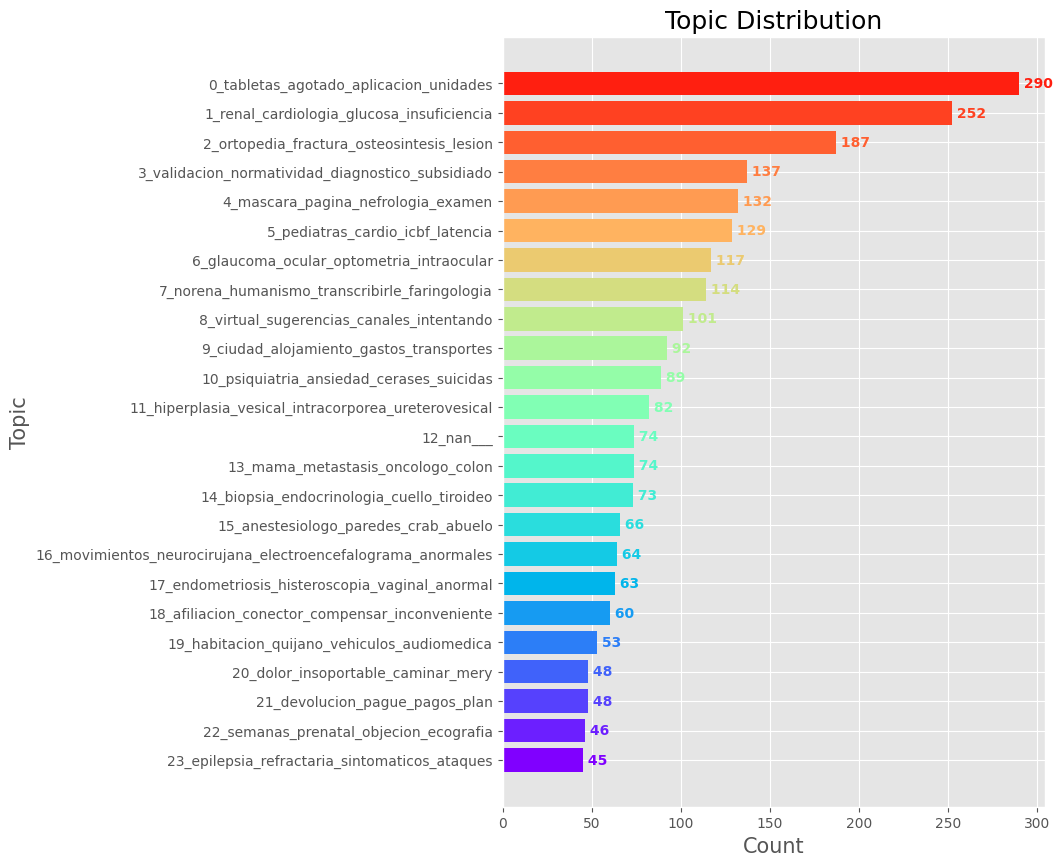

In [16]:
colors = plt.cm.rainbow(np.linspace(0, 1, top_topics))
iter_color = iter(colors)

fig = plt.figure(figsize=(7,10))

plt.barh('Name', 'Count',
         data=topics_pivot.head(top_topics).drop([0]).sort_values('Count',ascending=True), color=colors)
plt.xlabel("Count", size=15)
plt.ylabel("Topic", size=15)
plt.title("Topic Distribution", size=18)

for i, v in enumerate(topics_pivot.head(top_topics).drop([0])["Count"].sort_values(ascending=True)):
  c = next(iter_color)
  plt.text(v, i, " "+str(v), color=c, va='center', fontweight='bold')